In [3]:
# CPU libraries
import os
import json
from glob import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from PIL import Image, ImageOps
from skimage import io
from skimage.color import rgba2rgb, rgb2xyz
from tqdm import tqdm
from dataclasses import dataclass
from math import floor, ceil

import json
from PIL import Image


In [137]:
!pwd

/Users/macbookpro/Downloads/urbancom1/working


In [19]:
# How 1 path looks
#base = './data'
#path = f'{base}/site1/B1/path_data_files/5dda14a2c5b77e0006b17533.txt'

# Example usage
base_dir = './data'  # Replace with your actual base directory

# path= './train/5cd969fd39e2fc0b4afeca61/F1/5d0879a0bb84450008f56b4d.txt'
print(base_dir)


# with open(path) as p:
#     lines = p.readlines()

# print("No. Lines in 1 example: {:,}". format(len(lines)), "\n" +
#       "Example (5 lines): ", lines[0:5])

./data


In [20]:
import os

def iterate_through_folders(base_dir):
    """
    Iterates through folders with the structure ./train/<site>/<floor>/<filename>.txt
    and returns lists of floors and filenames.

    Args:
        base_dir: The base directory to start the search from.

    Returns:
        tuple: A tuple containing two lists:
            - floors: A list of unique floor names found.
            - filenames: A list of all .txt filenames found.
    """

    floors = set()  # Use a set to store unique floor names
    filenames = []
    sitenames=set()

    for site_dir in os.listdir(base_dir):
        site_path = os.path.join(base_dir, site_dir)
        sitenames.add(site_dir)
        if os.path.isdir(site_path):
            for floor_dir in os.listdir(site_path):
                floor_path = os.path.join(site_path, floor_dir)
                if os.path.isdir(floor_path):
                    floors.add(floor_dir)  # Add floor name to the set
                    for filename in os.listdir(floor_path):
                        if filename.endswith('.txt'):
                            filenames.append(os.path.join(site_path, floor_dir, filename))

                            #filenames.append(filename)

    return sitenames,list(floors), filenames  # Convert the set to a list


sitenames,floors, filenames = iterate_through_folders(base_dir)

print("Floors:", floors)
print("Number of Floors:", len(floors))
print("Filenames:", filenames)
print("Number of Files:", len(filenames))   
print("Sitenames:", sitenames) 
print("Number of Sitenames:", len(sitenames)) 



Floors: ['F8', 'F2', 'F5', 'F3', 'F7', 'B1', 'F4', 'F6', 'F1']
Number of Floors: 9
Filenames: []
Number of Files: 0
Sitenames: {'site2', 'site1'}
Number of Sitenames: 2


In [126]:
# # pull out all the buildings actually used in the test set, given current method we don't need the other ones
# ssubm = pd.read_csv('../input/indoor-location-navigation/sample_submission.csv')

# # only 24 of the total buildings are used in the test set, 
# # this allows us to greatly reduce the intial size of the dataset

# ssubm_df = ssubm["site_path_timestamp"].apply(lambda x: pd.Series(x.split("_")))
# used_buildings = sorted(ssubm_df[0].value_counts().index.tolist())

# # dictionary used to map the floor codes to the values used in the submission file. 
# floor_map = {"B2":-2, "B1":-1, "F1":0, "F2": 1, "F3":2, "F4":3, "F5":4, "F6":5, "F7":6,"F8":7, "F9":8,
#              "1F":0, "2F":1, "3F":2, "4F":3, "5F":4, "6F":5, "7F":6, "8F": 7, "9F":8}

In [127]:
# import re
# import pandas as pd

# def extract_data(file_path):
#     patterns = {
#         'ACCELEROMETER': r'TYPE_ACCELEROMETER\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'MAGNETIC_FIELD': r'TYPE_MAGNETIC_FIELD\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'GYROSCOPE': r'TYPE_GYROSCOPE\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'ROTATION_VECTOR': r'TYPE_ROTATION_VECTOR\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'MAGNETIC_FIELD_UNCALIBRATED': r'TYPE_MAGNETIC_FIELD_UNCALIBRATED\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'GYROSCOPE_UNCALIBRATED': r'TYPE_GYROSCOPE_UNCALIBRATED\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'ACCELEROMETER_UNCALIBRATED': r'TYPE_ACCELEROMETER_UNCALIBRATED\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+(\d+)',
#         'WIFI': r'TYPE_WIFI\s+(.*?)\s+([\w:]+)\s+([-\d]+)\s+(\d+)\s+(\d+)',
#         'BEACON': r'TYPE_BEACON\s+([\w-]+)\s+(\d+)\s+(\d+)\s+([-\d]+)\s+([-\d]+)\s+([-\d.]+)\s+([\w:]+)\s+(\d+)',
#         'WAYPOINT': r'TYPE_WAYPOINT\s+([-\d.]+)\s+([-\d.]+)'
#     }
#     timestamp_pattern = r'^(\d+)'

#     data = []
#     current_timestamp = None
    
#     # Extract site and floor level from file path using regex
#     match = re.search(r'.*/([^/]+)/([BF]\d+)/[^/]+\.txt', file_path)
#     if match:
#         site = match.group(1)
#         floor_level = match.group(2)
#     else:
#         site = "Unknown"
#         floor_level = "Unknown"
    
#     # Extract floor level from file path
#     #path_parts = file_path.split(os.path.sep)
#     #floor_level = next((part for part in path_parts if part.startswith('B') or part.startswith('F')), None)


#     with open(file_path, 'r') as file:
#         for line in file:
#             timestamp_match = re.match(timestamp_pattern, line)
#             if timestamp_match:
#                 current_timestamp = int(timestamp_match.group(1))
            
#             for sensor_type, pattern in patterns.items():
#                 match = re.search(pattern, line)
#                 if match:
#                     if sensor_type in ['ACCELEROMETER', 'MAGNETIC_FIELD', 'GYROSCOPE', 'ROTATION_VECTOR']:
#                         data.append({
#                             'timestamp': current_timestamp,
#                             'sensor_type': sensor_type,
#                             'x': float(match.group(1)),
#                             'y': float(match.group(2)),
#                             'z': float(match.group(3)),
#                             'accuracy': int(match.group(4)),
#                             'floor_level': floor_level,
#                             'site': site
#                         })
#                     elif sensor_type in ['MAGNETIC_FIELD_UNCALIBRATED', 'GYROSCOPE_UNCALIBRATED', 'ACCELEROMETER_UNCALIBRATED']:
#                         data.append({
#                             'timestamp': current_timestamp,
#                             'sensor_type': sensor_type,
#                             'x': float(match.group(1)),
#                             'y': float(match.group(2)),
#                             'z': float(match.group(3)),
#                             'x_bias': float(match.group(4)),
#                             'y_bias': float(match.group(5)),
#                             'z_bias': float(match.group(6)),
#                             'accuracy': int(match.group(7)),
#                             'floor_level': floor_level,
#                             'site': site
#                         })
#                     elif sensor_type == 'WIFI':
#                         data.append({
#                             'timestamp': current_timestamp,
#                             'sensor_type': sensor_type,
#                             'ssid': match.group(1),
#                             'bssid': match.group(2),
#                             'rssi': int(match.group(3)),
#                             'frequency': int(match.group(4)),
#                             'timestamp_ms': int(match.group(5)),
#                             'floor_level': floor_level,
#                             'site': site
#                         })
#                     elif sensor_type == 'BEACON':
#                         data.append({
#                             'timestamp': current_timestamp,
#                             'sensor_type': sensor_type,
#                             'uuid': match.group(1),
#                             'major': int(match.group(2)),
#                             'minor': int(match.group(3)),
#                             'tx_power': int(match.group(4)),
#                             'rssi': int(match.group(5)),
#                             'distance': float(match.group(6)),
#                             'mac_address': match.group(7),
#                             'timestamp_ms': int(match.group(8)),
#                             'floor_level': floor_level,
#                             'site': site
#                         })
#                     elif sensor_type == 'WAYPOINT':
#                         data.append({
#                             'timestamp': current_timestamp,
#                             'sensor_type': sensor_type,
#                             'x': float(match.group(1)),
#                             'y': float(match.group(2)),
#                             'floor_level': floor_level,
#                             'site': site
#                         })
#                     break  # Stop after first match for each line

#     return pd.DataFrame(data)



In [128]:
# def process_all_files(base_dir):
#     sitenames, floors, filenames = iterate_through_folders(base_dir)
    
#     all_data = []
#     for file_path in filenames:
#         df = extract_data(file_path)
#         all_data.append(df)
    
#     final_df = pd.concat(all_data, ignore_index=True)
#     return final_df

# # Usage
# base_dir = "./train"  # Adjust this to your actual base directory
# final_dataframe = process_all_files(base_dir)

# # Display the first few rows and shape of the final DataFrame
# print(final_dataframe.head())
# print(f"\nFinal DataFrame shape: {final_dataframe.shape}")

# # Optional: Save to CSV
# # final_dataframe.to_csv('all_sensor_data.csv', index=False)

In [168]:
from dataclasses import dataclass
import numpy as np
import os
import pandas as pd

@dataclass
class ReadData:
    acce: np.ndarray
    acce_uncali: np.ndarray
    gyro: np.ndarray
    gyro_uncali: np.ndarray
    magn: np.ndarray
    magn_uncali: np.ndarray
    ahrs: np.ndarray
    wifi: np.ndarray
    ibeacon: np.ndarray
    waypoint: np.ndarray
    site: str
    floor: str

def read_data_file(data_filename):
    acce = []
    acce_uncali = []
    gyro = []
    gyro_uncali = []
    magn = []
    magn_uncali = []
    ahrs = []
    wifi = []
    ibeacon = []
    waypoint = []

    # Extract site and floor from the filename
    parts = data_filename.split(os.sep)
    site = parts[-3]
    floor = parts[-2]

    current_waypoint = None

    with open(data_filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line_data in lines:
        line_data = line_data.strip()
        if not line_data or line_data[0] == '#':
            continue

        line_data = line_data.split('\t')
        timestamp = int(line_data[0])

        if line_data[1] == 'TYPE_WAYPOINT':
            current_waypoint = [float(line_data[2]), float(line_data[3])]
            waypoint.append([timestamp] + current_waypoint)
        else:
            waypoint_data = current_waypoint if current_waypoint else [None, None]

            if line_data[1] == 'TYPE_ACCELEROMETER':
                acce.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_ACCELEROMETER_UNCALIBRATED':
                acce_uncali.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_GYROSCOPE':
                gyro.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_GYROSCOPE_UNCALIBRATED':
                gyro_uncali.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_MAGNETIC_FIELD':
                magn.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_MAGNETIC_FIELD_UNCALIBRATED':
                magn_uncali.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_ROTATION_VECTOR':
                ahrs.append([timestamp] + [float(x) for x in line_data[2:5]] + waypoint_data)
            elif line_data[1] == 'TYPE_WIFI':
                wifi.append([timestamp, line_data[2], line_data[3], int(line_data[4]), int(line_data[6])] + waypoint_data)
            elif line_data[1] == 'TYPE_BEACON':
                ibeacon.append([timestamp, '_'.join([line_data[2], line_data[3], line_data[4]]), int(line_data[6])] + waypoint_data)

    return ReadData(
        np.array(acce),
        np.array(acce_uncali),
        np.array(gyro),
        np.array(gyro_uncali),
        np.array(magn),
        np.array(magn_uncali),
        np.array(ahrs),
        np.array(wifi),
        np.array(ibeacon),
        np.array(waypoint),
        site,
        floor
    )

def process_all_files(base_dir):
    all_data = []
    
    for site_dir in os.listdir(base_dir):
        site_path = os.path.join(base_dir, site_dir)
        if os.path.isdir(site_path):
            for floor_dir in os.listdir(site_path):
                floor_path = os.path.join(site_path, floor_dir)
                if os.path.isdir(floor_path):
                    for filename in os.listdir(floor_path):
                        if filename.endswith('.txt'):
                            file_path = os.path.join(floor_path, filename)
                            read_data = read_data_file(file_path)
                            all_data.append(read_data)
    
    return all_data

def create_combined_dataframe(all_data):
    dataframes = []
    
    for data in all_data:
        sensor_data = [
            ('ACCELEROMETER', data.acce, ['timestamp', 'acce_x', 'acce_y', 'acce_z', 'waypoint_x', 'waypoint_y']),
            ('ACCELEROMETER_UNCALIBRATED', data.acce_uncali, ['timestamp', 'acce_uncali_x', 'acce_uncali_y', 'acce_uncali_z', 'waypoint_x', 'waypoint_y']),
            ('GYROSCOPE', data.gyro, ['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'waypoint_x', 'waypoint_y']),
            ('GYROSCOPE_UNCALIBRATED', data.gyro_uncali, ['timestamp', 'gyro_uncali_x', 'gyro_uncali_y', 'gyro_uncali_z', 'waypoint_x', 'waypoint_y']),
            ('MAGNETIC_FIELD', data.magn, ['timestamp', 'magn_x', 'magn_y', 'magn_z', 'waypoint_x', 'waypoint_y']),
            ('MAGNETIC_FIELD_UNCALIBRATED', data.magn_uncali, ['timestamp', 'magn_uncali_x', 'magn_uncali_y', 'magn_uncali_z', 'waypoint_x', 'waypoint_y']),
            ('ROTATION_VECTOR', data.ahrs, ['timestamp', 'ahrs_x', 'ahrs_y', 'ahrs_z', 'waypoint_x', 'waypoint_y']),
            ('WIFI', data.wifi, ['timestamp', 'ssid', 'bssid', 'rssi', 'lastseen_ts', 'waypoint_x', 'waypoint_y']),
            ('BEACON', data.ibeacon, ['timestamp', 'uuid_major_minor', 'rssi', 'waypoint_x', 'waypoint_y']),
            ('WAYPOINT', data.waypoint, ['timestamp', 'waypoint_x', 'waypoint_y'])
        ]
        
        for sensor_type, sensor_array, columns in sensor_data:
            if sensor_array.size > 0:
                df = pd.DataFrame(sensor_array, columns=columns)
                df['sensor_type'] = sensor_type
                df['site'] = data.site
                df['floor'] = data.floor
                dataframes.append(df)
    
    if dataframes:
        final_df = pd.concat(dataframes, ignore_index=True)
    else:
        final_df = pd.DataFrame()
    
    return final_df

# Usage
base_dir = "./train"  # Adjust this to your actual base directory
all_data = process_all_files(base_dir)
final_dataframe = create_combined_dataframe(all_data)

# Display the first few rows and shape of the final DataFrame
print(final_dataframe.head())
print(f"\nFinal DataFrame shape: {final_dataframe.shape}")

# Optional: Save to CSV
# final_dataframe.to_csv('all_sensor_data.csv', index=False)

         timestamp    acce_x    acce_y     acce_z waypoint_x waypoint_y  \
0  1560137994475.0  0.617355  2.504089  10.092926   83.31165  57.659363   
1  1560137994495.0  0.636490  2.421539  10.003204   83.31165  57.659363   
2  1560137994515.0  0.821945  2.404785   9.450455   83.31165  57.659363   
3  1560137994534.0  0.792023  2.292328   9.395416   83.31165  57.659363   
4  1560137994554.0  0.669998  2.252853   9.663422   83.31165  57.659363   

     sensor_type                      site floor  acce_uncali_x  ...  \
0  ACCELEROMETER  5cd56865eb294480de7167b6    F4            NaN  ...   
1  ACCELEROMETER  5cd56865eb294480de7167b6    F4            NaN  ...   
2  ACCELEROMETER  5cd56865eb294480de7167b6    F4            NaN  ...   
3  ACCELEROMETER  5cd56865eb294480de7167b6    F4            NaN  ...   
4  ACCELEROMETER  5cd56865eb294480de7167b6    F4            NaN  ...   

   magn_uncali_y  magn_uncali_z  ahrs_x  ahrs_y  ahrs_z  ssid  bssid  rssi  \
0            NaN            NaN     Na

In [157]:
# Optional: Save to CSV
final_dataframe.to_csv('all_sensor_data.csv', index=False)

In [160]:
final_dataframe['waypoint_x'].count()

np.int64(3003844)

In [161]:
final_dataframe['sensor_type'].unique()



array(['ACCELEROMETER', 'ACCELEROMETER_UNCALIBRATED', 'GYROSCOPE',
       'GYROSCOPE_UNCALIBRATED', 'MAGNETIC_FIELD',
       'MAGNETIC_FIELD_UNCALIBRATED', 'ROTATION_VECTOR', 'WIFI', 'BEACON',
       'WAYPOINT'], dtype=object)

In [162]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']['ssid'].value_counts()


ssid
da39a3ee5e6b4b0d3255bfef95601890afd80709    29386
7368e642d96d744964f6190f21e441bef89f5982    12658
39db40987727b4404daf02cef84642c6678851d3    12173
2241a80de9ceb4636760335eed9f913a0717f251    11835
0e68ed684eceaf753b964d6c575bf5b909b84073    11504
                                            ...  
929f0eed45ad277f4c03b563b01690db68549f71        3
77812408997119653c68fe22614ad20e3f61c9d7        3
b343f2537cd7bb80d2a51e87a90907fbc2fd3952        3
a8d6486d3c8c7b456b12e0900848477e29a19f22        2
46e0efa6c270d53d653fe0004701a3630bba916d        2
Name: count, Length: 1287, dtype: int64

In [154]:
final_dataframe[final_dataframe['bssid']=='2c0bdf82f642204b1c78bb891522ab2006d829be']

,timestamp,acce_x,acce_y,acce_z,sensor_type,site,floor,acce_uncali_x,acce_uncali_y,acce_uncali_z,...,ahrs_x,ahrs_y,ahrs_z,ssid,bssid,rssi,lastseen_ts,uuid_major_minor,waypoint_x,waypoint_y
5513,1560137995111,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F4,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-78,1560137977903,NaN,NaN,NaN
5573,1560137995805,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F4,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-78,1560137977902,NaN,NaN,NaN
5632,1560137996441,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F4,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-78,1560137977903,NaN,NaN,NaN
5690,1560137997075,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F4,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-78,1560137977903,NaN,NaN,NaN
5749,1560137997683,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F4,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-78,1560137977902,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782265,1560135632391,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F1,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-80,1560135607328,NaN,NaN,NaN
782348,1560135633010,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F1,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-80,1560135607328,NaN,NaN,NaN
782433,1560135633650,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F1,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-80,1560135607328,NaN,NaN,NaN
782517,1560135634287,NaN,NaN,NaN,WIFI,5cd56865eb294480de7167b6,F1,NaN,NaN,NaN,...,NaN,NaN,NaN,b5abc4156a39d5980c76c18cadc5723b5becf5a4,2c0bdf82f642204b1c78bb891522ab2006d829be,-80,1560135607327,NaN,NaN,NaN


In [163]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']['ssid'].nunique()

1287

In [164]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']['bssid'].value_counts()



bssid
2c0bdf82f642204b1c78bb891522ab2006d829be    1782
6b398356ef6062caa3c1bfa375bc1a1296de229c    1726
56f4befe81f4594bd874bf96f6405feaba7699e7    1704
a5a4a2818789eeb2486a80e84d9fba75897781b0    1687
eaa1aa331bc317c2a8b151d16d03b3d5029082ab    1658
                                            ... 
1d71eabcf9304044c14a1d32b25bcc83db086620       2
519564da94d9785ccf6f48b11b2652b9b5f9ed03       2
6a8d5c6a02da9478f37a2f24732eb7956aedb1fa       1
f0b6dfe03b98212c49c672d2629dba9d83c2f370       1
8c06f837cdc64021862d87291b6ae7587d6038a3       1
Name: count, Length: 1864, dtype: int64

In [150]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']['bssid'].nunique()


1864

In [151]:
final_dataframe.columns

Index(['timestamp', 'acce_x', 'acce_y', 'acce_z', 'sensor_type', 'site',
       'floor', 'acce_uncali_x', 'acce_uncali_y', 'acce_uncali_z', 'gyro_x',
       'gyro_y', 'gyro_z', 'gyro_uncali_x', 'gyro_uncali_y', 'gyro_uncali_z',
       'magn_x', 'magn_y', 'magn_z', 'magn_uncali_x', 'magn_uncali_y',
       'magn_uncali_z', 'ahrs_x', 'ahrs_y', 'ahrs_z', 'ssid', 'bssid', 'rssi',
       'lastseen_ts', 'uuid_major_minor', 'waypoint_x', 'waypoint_y'],
      dtype='object')

In [165]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']['rssi'].value_counts()



rssi
-81    28629
-79    27012
-78    26418
-72    25991
-82    25963
       ...  
-27        7
-26        3
-28        3
-24        1
-16        1
Name: count, Length: 72, dtype: int64

In [169]:
final_dataframe.to_csv('all_sensor_data.csv', index=False)

In [170]:
final_dataframe['floor'].value_counts()

floor
F1    748399
F2    596231
F4    458820
F5    446640
F3    416294
F6    337460
Name: count, dtype: int64

In [173]:
final_dataframe[final_dataframe['sensor_type']=='WIFI']

,timestamp,acce_x,acce_y,acce_z,waypoint_x,waypoint_y,sensor_type,site,floor,acce_uncali_x,...,magn_uncali_y,magn_uncali_z,ahrs_x,ahrs_y,ahrs_z,ssid,bssid,rssi,lastseen_ts,uuid_major_minor
5471,1560137995111,NaN,NaN,NaN,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,NaN,...,NaN,NaN,NaN,NaN,NaN,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609,NaN
5472,1560137995111,NaN,NaN,NaN,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,NaN,...,NaN,NaN,NaN,NaN,NaN,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615,NaN
5473,1560137995111,NaN,NaN,NaN,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,NaN,...,NaN,NaN,NaN,NaN,NaN,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436,NaN
5474,1560137995111,NaN,NaN,NaN,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,NaN,...,NaN,NaN,NaN,NaN,NaN,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469,NaN
5475,1560137995111,NaN,NaN,NaN,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,NaN,...,NaN,NaN,NaN,NaN,NaN,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003831,1560836496550,NaN,NaN,NaN,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,NaN,...,NaN,NaN,NaN,NaN,NaN,b7f5113f83376fc4334a2f305303bd99b533a5c4,5a13c3d544ab7bb50ddcd89b6208f0582417c2ec,-77,1560836495442,NaN
3003832,1560836496550,NaN,NaN,NaN,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,NaN,...,NaN,NaN,NaN,NaN,NaN,dde853fb2e78d14ba0a23979da99bf92940aad70,e13e4c85b43fcd88605fff8d39b9bc49255dfc6e,-81,1560836496121,NaN
3003833,1560836496550,NaN,NaN,NaN,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,NaN,...,NaN,NaN,NaN,NaN,NaN,b343f2537cd7bb80d2a51e87a90907fbc2fd3952,c346471b43df75b1c08d35b454fec0863294cd4c,-83,1560836494723,NaN
3003834,1560836496550,NaN,NaN,NaN,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,NaN,...,NaN,NaN,NaN,NaN,NaN,e192ca87fc87b20f8de8342337d5273b9f38e1d1,b8f4c0c198e1584cb878049f8e708a46c7f2526b,-71,1560836494903,NaN


In [191]:
final_dataframe.groupby(['site','floor'])['bssid'].nunique()

site                      floor
5cd56865eb294480de7167b6  F1       366
                          F2       205
                          F3       198
                          F4       210
                          F5       176
5cd969fd39e2fc0b4afeca61  F1        87
                          F2       135
5cdac61de403deddaf467f4f  F1       462
                          F2       496
                          F3       442
                          F4       398
                          F5       387
                          F6       343
Name: bssid, dtype: int64

In [198]:
final_dataframe.groupby(['site','floor','bssid']).size().reset_index(name='bssid_count')

,site,floor,bssid,bssid_count
0,5cd56865eb294480de7167b6,F1,007719f8277ce1ab2c38de826f71a03dfcdb5c10,199
1,5cd56865eb294480de7167b6,F1,029ee8ab6c513682948c9494ac7c3b0cdb82803b,440
2,5cd56865eb294480de7167b6,F1,049e270ced73981229b9e04020f778b43e00a03a,93
3,5cd56865eb294480de7167b6,F1,04f884fd2ba428bdd56159ab0bee789fe9c96d37,239
4,5cd56865eb294480de7167b6,F1,058a38b8f776d676b350aada8e84d73ae238ba92,320
...,...,...,...,...
3900,5cdac61de403deddaf467f4f,F6,fcfe6560de2aeffe90fe79f1cabcaf9892183531,159
3901,5cdac61de403deddaf467f4f,F6,fe1ff2d45c65098e80013544804f0faef0f5e26e,80
3902,5cdac61de403deddaf467f4f,F6,ff3f8afd74bb407fc5481a143750698df6555bf6,62
3903,5cdac61de403deddaf467f4f,F6,ff451be8a5454005506c5a3e384aa7139c45ae71,50


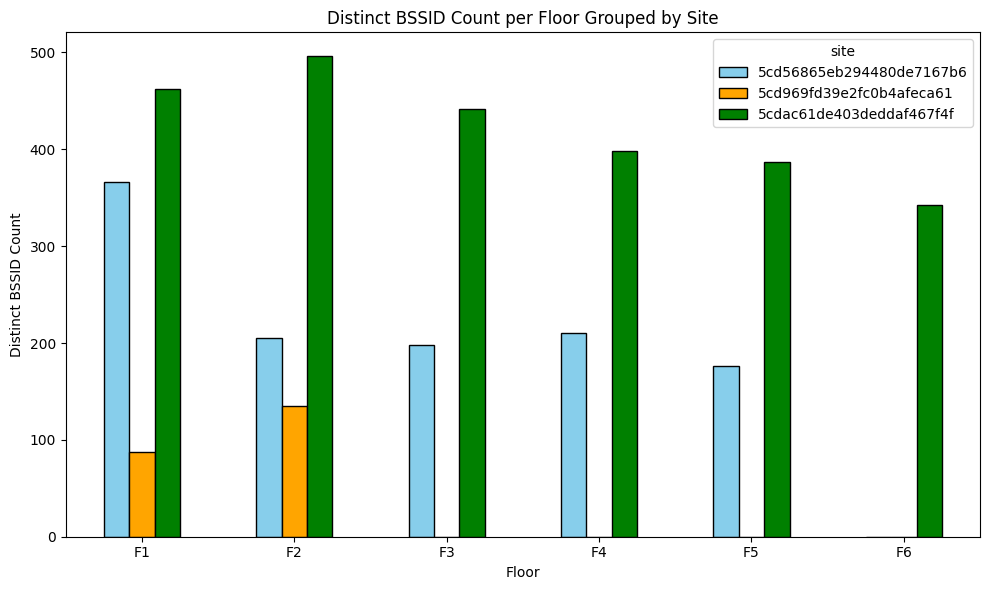

,site,floor,bssid
0,5cd56865eb294480de7167b6,F1,366
1,5cd56865eb294480de7167b6,F2,205
2,5cd56865eb294480de7167b6,F3,198
3,5cd56865eb294480de7167b6,F4,210
4,5cd56865eb294480de7167b6,F5,176
5,5cd969fd39e2fc0b4afeca61,F1,87
6,5cd969fd39e2fc0b4afeca61,F2,135
7,5cdac61de403deddaf467f4f,F1,462
8,5cdac61de403deddaf467f4f,F2,496
9,5cdac61de403deddaf467f4f,F3,442


In [193]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Group by floor and count distinct bssid
# #distinct_bssid_per_floor = final_dataframe.groupby('floor')['bssid'].nunique()
# distinct_bssid_per_floor=final_dataframe.groupby(['site','floor'])['bssid'].nunique()
# # Plotting the result
# plt.figure(figsize=(8, 6))
# distinct_bssid_per_floor.plot(kind='bar', color='skyblue')
# plt.title('Distinct BSSID Count per Floor')
# plt.xlabel('Floor')
# plt.ylabel('Distinct BSSID Count')
# plt.xticks(rotation=0)
# plt.tight_layout()

# # Show the plot
# plt.show()

# distinct_bssid_per_floor

# Modified version of the code to group by 'site' and then by 'floor', with improved plotting.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_dataframe is already defined and contains the necessary data

# Group by 'site' and 'floor' and count distinct bssid
distinct_bssid_per_floor = final_dataframe.groupby(['site', 'floor'])['bssid'].nunique()

# Reset index to flatten the multi-index for easier plotting
distinct_bssid_per_floor = distinct_bssid_per_floor.reset_index()

# Pivot the table to make 'site' the category for grouped bars
pivot_data = distinct_bssid_per_floor.pivot(index='floor', columns='site', values='bssid')

# Plotting the result with grouped bars for each site
pivot_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red', 'purple'], edgecolor='black')

plt.title('Distinct BSSID Count per Floor Grouped by Site')
plt.xlabel('Floor')
plt.ylabel('Distinct BSSID Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

distinct_bssid_per_floor


In [177]:
final_dataframe.columns

Index(['timestamp', 'acce_x', 'acce_y', 'acce_z', 'waypoint_x', 'waypoint_y',
       'sensor_type', 'site', 'floor', 'acce_uncali_x', 'acce_uncali_y',
       'acce_uncali_z', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_uncali_x',
       'gyro_uncali_y', 'gyro_uncali_z', 'magn_x', 'magn_y', 'magn_z',
       'magn_uncali_x', 'magn_uncali_y', 'magn_uncali_z', 'ahrs_x', 'ahrs_y',
       'ahrs_z', 'ssid', 'bssid', 'rssi', 'lastseen_ts', 'uuid_major_minor'],
      dtype='object')

In [303]:
sel_cols=['timestamp', 'waypoint_x', 'waypoint_y','sensor_type', 'site', 'floor', 'ssid', 'bssid', 'rssi', 'lastseen_ts']

df=final_dataframe[final_dataframe['sensor_type']=='WIFI'][sel_cols]

df.head()

,timestamp,waypoint_x,waypoint_y,sensor_type,site,floor,ssid,bssid,rssi,lastseen_ts
5471,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609
5472,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615
5473,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436
5474,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469
5475,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164


In [292]:
df.shape

(752774, 10)

In [235]:
df.to_csv('wifi_data.csv', index=False)

In [293]:
# Get summary statistics of the bssid_count
summary_stats = distinct_bssid_per_floor.describe()

# Display the summary statistics
print(summary_stats)




            bssid
count   13.000000
mean   300.384615
std    136.534207
min     87.000000
25%    198.000000
50%    343.000000
75%    398.000000
max    496.000000


# Data Augmentation

In [304]:
df.head()

,timestamp,waypoint_x,waypoint_y,sensor_type,site,floor,ssid,bssid,rssi,lastseen_ts
5471,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609
5472,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615
5473,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436
5474,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469
5475,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164


In [295]:
df.groupby(['site','floor','waypoint_x','waypoint_y'])['bssid'].nunique().describe()

count    273.000000
mean     128.095238
std       48.842767
min       16.000000
25%       90.000000
50%      127.000000
75%      166.000000
max      236.000000
Name: bssid, dtype: float64

In [296]:
df.groupby(['waypoint_x','waypoint_y'])['bssid'].nunique().sum()

np.int64(34970)

In [305]:
df['bssid'].nunique()

1864

In [298]:
df.groupby(['site','floor','waypoint_x','waypoint_y']).nunique()

timestamp  sensor_type  \
site                     floor waypoint_x waypoint_y                           
5cd56865eb294480de7167b6 F1    20.26071   36.166813          39            1   
                               33.610245  84.14219           25            1   
                               37.131813  62.614746          55            1   
                               42.75301   67.07399           55            1   
                               44.210052  47.231945          92            1   
...                                                         ...          ...   
5cdac61de403deddaf467f4f F6    62.619453  64.47383            9            1   
                               64.71856   31.724382          58            1   
                               65.974464  20.01638           31            1   
                               66.738106  17.19203            4            1   
                               9.75652    50.947384          29            1   

                                                      ssid  bssid  rssi  \
site                     floor waypoint_x waypoint_y                      
5cd56865eb294480de7167b6 F1    20.26071   36.166813     79     92    49   
                               33.610245  84.14219      96    119    54   
                               37.131813  62.614746     85    112    60   
                               42.75301   67.07399     112    146    61   
                               44.210052  47.231945    110    149    52   
...                                                    ...    ...   ...   
5cdac61de403deddaf467f4f F6    62.619453  64.47383      65     77    42   
                               64.71856   31.724382    116    135    53   
                               65.974464  20.01638      73     83    53   
                               66.738106  17.19203      60     68    33   
                               9.75652    50.947384    111    140    43   

                                                      lastseen_ts  
site                     floor waypoint_x waypoint_y               
5cd56865eb294480de7167b6 F1    20.26071   36.166813           679  
                               33.610245  84.14219            638  
                               37.131813  62.614746          1295  
                               42.75301   67.07399           1115  
                               44.210052  47.231945          1808  
...                                                           ...  
5cdac61de403deddaf467f4f F6    62.619453  64.47383            269  
                               64.71856   31.724382          1289  
                               65.974464  20.01638            506  
                               66.738106  17.19203            152  
                               9.75652    50.947384           708  

[273 rows x 6 columns]

In [299]:
df.groupby(['waypoint_x','waypoint_y']).size().reset_index(name='count')

,waypoint_x,waypoint_y,count
0,10.023447,54.34655,2191
1,10.095709,45.13612,4938
2,10.127566,43.40176,4057
3,10.644911,6.6687956,1269
4,10.958986,10.391978,3613
...,...,...,...
268,9.714407,53.437595,4524
269,9.75652,50.947384,2221
270,9.931117,52.920013,3565
271,9.987782,43.980293,3651


In [306]:
# Generate dynamic mappings for site and floor based on the unique values in the data
site_mapping = {site: idx for idx, site in enumerate(df['site'].unique(), start=1)}
floor_mapping = {floor: idx for idx, floor in enumerate(df['floor'].unique(), start=1)}

# Perform the mapping for site and floor
df['site_mapped'] = df['site'].map(site_mapping)
df['floor_mapped'] = df['floor'].map(floor_mapping)


# Ensure that 'rssi' is numeric
df['rssi'] = pd.to_numeric(df['rssi'], errors='coerce')  # Non-numeric values will be set to NaN



In [307]:
df=df.astype({'timestamp':'int', 'lastseen_ts':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752774 entries, 5471 to 3003835
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamp     752774 non-null  int64 
 1   waypoint_x    752774 non-null  object
 2   waypoint_y    752774 non-null  object
 3   sensor_type   752774 non-null  object
 4   site          752774 non-null  object
 5   floor         752774 non-null  object
 6   ssid          752774 non-null  object
 7   bssid         752774 non-null  object
 8   rssi          752774 non-null  int64 
 9   lastseen_ts   752774 non-null  int64 
 10  site_mapped   752774 non-null  int64 
 11  floor_mapped  752774 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 74.7+ MB


In [308]:
df

,timestamp,waypoint_x,waypoint_y,sensor_type,site,floor,ssid,bssid,rssi,lastseen_ts,site_mapped,floor_mapped
5471,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609,1,1
5472,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615,1,1
5473,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436,1,1
5474,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469,1,1
5475,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3003831,1560836496550,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,b7f5113f83376fc4334a2f305303bd99b533a5c4,5a13c3d544ab7bb50ddcd89b6208f0582417c2ec,-77,1560836495442,3,5
3003832,1560836496550,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,dde853fb2e78d14ba0a23979da99bf92940aad70,e13e4c85b43fcd88605fff8d39b9bc49255dfc6e,-81,1560836496121,3,5
3003833,1560836496550,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,b343f2537cd7bb80d2a51e87a90907fbc2fd3952,c346471b43df75b1c08d35b454fec0863294cd4c,-83,1560836494723,3,5
3003834,1560836496550,52.14598,29.041264,WIFI,5cd969fd39e2fc0b4afeca61,F1,e192ca87fc87b20f8de8342337d5273b9f38e1d1,b8f4c0c198e1584cb878049f8e708a46c7f2526b,-71,1560836494903,3,5


In [309]:
df.to_csv('wifi_data.csv', index=False)

In [310]:

# Group by 'site', 'floor', and 'bssid' and calculate max, min, and average rssi
aggregated_df = df.groupby(['site_mapped', 'floor_mapped', 'bssid']).agg(
    min_rssi=('rssi', 'min'),
    max_rssi=('rssi', 'max'),
    avg_rssi=('rssi', 'mean'),
    waypoint_x=('waypoint_x', 'first'),
    waypoint_y=('waypoint_y', 'first')
).reset_index()

# Rename columns for clarity
aggregated_df.rename(columns={
    'site_mapped': 'site',
    'floor_mapped': 'floor',
    'bssid': 'unique_bssid'
}, inplace=True)

# Display the result
print(aggregated_df)
print("Site Mapping:", site_mapping)
print("Floor Mapping:", floor_mapping)



      site  floor                              unique_bssid  min_rssi  \
0        1      1  01ad55179c253c19536c5b8b701a471e460c857b       -82   
1        1      1  029ee8ab6c513682948c9494ac7c3b0cdb82803b       -71   
2        1      1  02cdfc531f12d5a98f820ffcf5f5b0298beb77b1       -82   
3        1      1  03c11c2d8ef6523f28992d83495ef6ad4e85ed3d       -83   
4        1      1  0454f4b92edc497372a28ef642f65d22d8a16144       -82   
...    ...    ...                                       ...       ...   
3900     3      5  f0b6dfe03b98212c49c672d2629dba9d83c2f370       -84   
3901     3      5  f8af43e78c5f47449d178b971d0929d06eabeefc       -80   
3902     3      5  f8bd045c8f16b6c20651ac6ec03f84faa2ac288d       -88   
3903     3      5  fada784c8bc47830bd84d751a92cec03febdea1e       -84   
3904     3      5  fecd6f775dd14d662fadd23bfd7d2356fa5ef768       -78   

      max_rssi   avg_rssi waypoint_x waypoint_y  
0          -36 -62.379310   83.31165  57.659363  
1          -71 -71.0000

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752774 entries, 5471 to 3003835
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamp     752774 non-null  int64 
 1   waypoint_x    752774 non-null  object
 2   waypoint_y    752774 non-null  object
 3   sensor_type   752774 non-null  object
 4   site          752774 non-null  object
 5   floor         752774 non-null  object
 6   ssid          752774 non-null  object
 7   bssid         752774 non-null  object
 8   rssi          752774 non-null  int64 
 9   lastseen_ts   752774 non-null  int64 
 10  site_mapped   752774 non-null  int64 
 11  floor_mapped  752774 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 74.7+ MB


In [245]:
df.groupby(['waypoint_x','waypoint_y']).agg(
    min_rssi=('rssi', 'min'),
    max_rssi=('rssi', 'max'),
    avg_rssi=('rssi', 'mean'),
).reset_index()

,waypoint_x,waypoint_y,min_rssi,max_rssi,avg_rssi
0,10.023447,54.34655,-91,-46,-72.827020
1,10.095709,45.13612,-91,-37,-73.513366
2,10.127566,43.40176,-91,-44,-77.086517
3,10.644911,6.6687956,-91,-46,-76.249015
4,10.958986,10.391978,-91,-40,-74.742319
...,...,...,...,...,...
268,9.714407,53.437595,-91,-39,-73.064545
269,9.75652,50.947384,-91,-49,-77.325979
270,9.931117,52.920013,-93,-43,-73.706031
271,9.987782,43.980293,-91,-38,-73.337168


In [246]:
aggregated_df.head()

,site,floor,unique_bssid,min_rssi,max_rssi,avg_rssi,waypoint_x,waypoint_y
0,1,1,01ad55179c253c19536c5b8b701a471e460c857b,-82,-36,-62.379310,83.31165,57.659363
1,1,1,029ee8ab6c513682948c9494ac7c3b0cdb82803b,-71,-71,-71.000000,23.48661,43.34009
2,1,1,02cdfc531f12d5a98f820ffcf5f5b0298beb77b1,-82,-45,-65.909938,83.31165,57.659363
3,1,1,03c11c2d8ef6523f28992d83495ef6ad4e85ed3d,-83,-73,-79.166667,83.31165,57.659363
4,1,1,0454f4b92edc497372a28ef642f65d22d8a16144,-82,-63,-64.263736,45.487885,54.410038


In [250]:
aggregated_df.groupby(['site']).size().reset_index(name='count')

,site,count
0,1,1155
1,2,2528
2,3,222


In [252]:
aggregated_df.groupby(['site','floor']).size().reset_index(name='count')

,site,floor,count
0,1,1,210
1,1,2,198
2,1,3,205
3,1,4,176
4,1,5,366
5,2,1,398
6,2,2,442
7,2,3,496
8,2,4,387
9,2,5,462


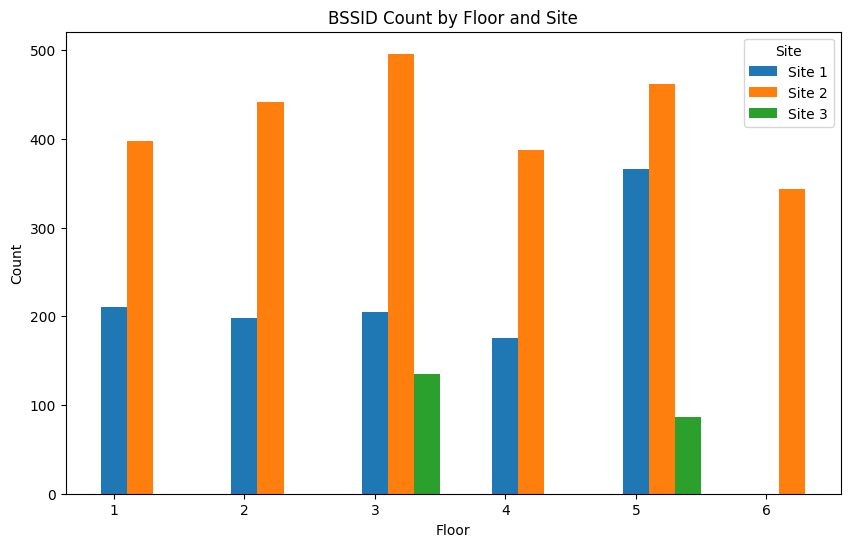

In [275]:
import matplotlib.pyplot as plt
import pandas as pd

temp_df=aggregated_df.groupby(['site','floor']).size().reset_index(name='count')

bar_width=0.2
# Plot multi-bar chart
plt.figure(figsize=(10, 6))
for site in temp_df['site'].unique():
    subset = temp_df[temp_df['site'] == site]
    plt.bar(subset['floor'] + (site* bar_width), subset['count'], width=bar_width, label=f'Site {site}')

plt.xlabel('Floor')
plt.ylabel('Count')
plt.title('BSSID Count by Floor and Site')
plt.xticks(temp_df['floor'].unique().astype(int) + bar_width, temp_df['floor'].unique())  # Center the ticks with bars
plt.legend(title='Site')

# Display the plot
plt.show()


In [313]:
df.head()

,timestamp,waypoint_x,waypoint_y,sensor_type,site,floor,ssid,bssid,rssi,lastseen_ts,site_mapped,floor_mapped
5471,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609,1,1
5472,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615,1,1
5473,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436,1,1
5474,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469,1,1
5475,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164,1,1


## Create site,floor and bbsid mappings

In [365]:

# Mapping between site and site_mapped
site_mapping = dict(zip(df['site'], df['site_mapped']))

# Mapping between floor and floor_mapped
floor_mapping = dict(zip(df['floor'], df['floor_mapped']))

# Mapping between unique bssid and integer number
unique_bssids = df['bssid'].unique()
bssid_mapping = {bssid: i for i, bssid in enumerate(unique_bssids)}


# Create a set of unique waypoints
unique_waypoints = set(zip(df['waypoint_x'], df['waypoint_y']))

# Mapping between unique waypoints and integer number
waypoint_mapping = {waypoint: i for i, waypoint in enumerate(unique_waypoints)}

print("Waypoint Mapping:", waypoint_mapping)

print("Site Mapping:", site_mapping)
print("Floor Mapping:", floor_mapping)
print("BSSID Mapping:", bssid_mapping)

Waypoint Mapping: {('44.210052', '47.231945'): 0, ('23.413315', '44.489456'): 1, ('61.132935', '52.278908'): 2, ('26.397867', '47.015038'): 3, ('62.67382', '46.510468'): 4, ('51.761837', '44.695847'): 5, ('47.383656', '26.882553'): 6, ('58.545544', '67.47555'): 7, ('12.823153', '47.70225'): 8, ('20.26071', '36.166813'): 9, ('54.01775', '50.7982'): 10, ('61.108288', '53.570972'): 11, ('58.626774', '67.82334'): 12, ('56.440094', '71.66227'): 13, ('37.812637', '47.675953'): 14, ('51.37727', '67.10283'): 15, ('73.254776', '42.315132'): 16, ('73.15116', '40.43209'): 17, ('12.39906', '48.421318'): 18, ('40.620014', '28.947554'): 19, ('26.043722', '51.2355'): 20, ('62.048676', '68.37445'): 21, ('12.434452', '53.433266'): 22, ('51.889305', '69.48058'): 23, ('21.646683', '49.17879'): 24, ('52.14598', '29.041264'): 25, ('50.84716', '23.467857'): 26, ('24.19204', '46.25776'): 27, ('59.922134', '64.36506'): 28, ('62.482468', '22.687477'): 29, ('13.514422', '24.848959'): 30, ('18.240686', '61.62111

In [366]:
df['bssid_mapping']=df['bssid'].map(bssid_mapping)
df['waypoint_mapping']=df[['waypoint_x','waypoint_y']].apply(tuple, axis=1).map(waypoint_mapping)

df.to_csv('wifi_data.csv', index=False)

In [368]:
# Save mappings to JSON files
with open('site_mapping.json', 'w') as f:
    json.dump(site_mapping, f, indent=4)

with open('floor_mapping.json', 'w') as f:
    json.dump(floor_mapping, f, indent=4)

with open('bssid_mapping.json', 'w') as f:
    json.dump(bssid_mapping, f, indent=4)
    
# Convert waypoint tuples to strings for JSON serialization
waypoint_mapping_str = {str(waypoint): i for waypoint, i in waypoint_mapping.items()}

with open('waypoint_mapping.json', 'w') as f:
    json.dump(waypoint_mapping_str, f, indent=4)

In [373]:
#Test the Loading and Mapping of the JSON files 
# Load mappings from JSON files
with open('site_mapping.json', 'r') as f:
    site_mapping = json.load(f)

with open('floor_mapping.json', 'r') as f:
    floor_mapping = json.load(f)

with open('bssid_mapping.json', 'r') as f:
    bssid_mapping = json.load(f)


def map_bssid(bssid):
    if bssid in bssid_mapping:
        return bssid_mapping[bssid]
    else:
        global max_bssid_value  # Access the global variable
        max_bssid_value += 1
        return max_bssid_value

#Load the waypoint mapping from the JSON file
with open('waypoint_mapping.json', 'r') as f:
    waypoint_mapping_str = json.load(f)
    # Convert string keys back to tuples
    waypoint_mapping = {eval(k): v for k, v in waypoint_mapping_str.items()}

def map_waypoint(x, y):
  """
  Maps a pair of waypoint_x and waypoint_y to an integer using the waypoint_mapping.

  Args:
    x: The value of waypoint_x.
    y: The value of waypoint_y.

  Returns:
    The mapped waypoint number if found in the mapping, otherwise None.
  """
  return waypoint_mapping.get((str(x), str(y)))


In [377]:
#test the waypoint mapping function
map_waypoint(51.761837,44.695847)

# # Sample data (replace with your actual DataFrame)
# temp_data = {
#     'waypoint_x': [44.210052, 23.413315, 62.67382, 51.761837, 44.210052],
#     'waypoint_y': [47.231945, 44.489456, 46.510468, 44.695847, 47.231945]
# }
# temp_wp = pd.DataFrame(temp_data)

# # Map waypoint_x and waypoint_y to integers
# temp_wp['waypoint_mapped'] = temp_wp.apply(lambda row: waypoint_mapping.get((str(row['waypoint_x']), str(row['waypoint_y']))), axis=1)

# print(temp_wp)

5

In [344]:

# Sample new data (replace with your actual data)
new_data = {
    'site': ['5cd56865eb294480de7167b6', '5cdac61de403deddaf467f4f'],
    'floor': ['F4', 'F3'],  # Assuming F3 is a new floor
    'bssid': ['584ff3f74810391c28f1327321702c2c02e9581d', '584ff3f74810391c28f1327321702c2c02e958zz']  # Assuming new_bssid is a new BSSID
}
new_df = pd.DataFrame(new_data)

# Map site, floor, and bssid in the new data
new_df['site_mapped'] = new_df['site'].map(site_mapping)
new_df['floor_mapped'] = new_df['floor'].map(floor_mapping)

# For new BSSIDs, assign a new integer value
max_bssid_value = max(bssid_mapping.values())

new_df['bssid_mapped'] = new_df['bssid'].apply(map_bssid)

print(new_df)

                       site floor                                     bssid  \
0  5cd56865eb294480de7167b6    F4  584ff3f74810391c28f1327321702c2c02e9581d   
1  5cdac61de403deddaf467f4f    F3  584ff3f74810391c28f1327321702c2c02e958zz   

   site_mapped  floor_mapped  bssid_mapped  
0            1             1             0  
1            2             2          1864  


## Creating RSSI Fingerprints

In [378]:
data=pd.read_csv("wifi_data.csv")
data.head()

,timestamp,waypoint_x,waypoint_y,sensor_type,site,floor,ssid,bssid,rssi,lastseen_ts,site_mapped,floor_mapped,bssid_mapping,waypoint_mapping
0,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,f1813f5165864998bcfe6f41d0090fff39c85ec4,584ff3f74810391c28f1327321702c2c02e9581d,-68,1560137979609,1,1,0,189
1,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,797364c83b57cebf641d77d83b101281313db37b,114ef46e9e0cb7671258fc88198a0096549ad095,-69,1560137979615,1,1,1,189
2,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,b9ce2b5dad89d528da299126451d73c6142ddfc7,dfefecdca04cb30d1208abad7c7c0901d9efebcc,-82,1560137980436,1,1,2,189
3,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,8a8d00f8a5b0461cb057080b81f0c4311396280a,92691550633f7b8e6c6deefc252995484674c54e,-66,1560137966469,1,1,3,189
4,1560137995111,83.31165,57.659363,WIFI,5cd56865eb294480de7167b6,F4,26072b8780dcd5d4474b80f1b382e7f045927f89,8e07c047beb111539acbd213a7377d37b3f72931,-79,1560137989164,1,1,4,189


In [346]:
# Load the bssid mapping

with open('bssid_mapping.json', 'r') as f:
    bssid_mapping = json.load(f)


# Total number of APs (N)
N = len(bssid_mapping)
print(f'Total number of APs : {N}')
# Step 1: Create RSSI fingerprints as vectors for each Reference Point (RP)
# Group data by 'waypoint_x' and 'waypoint_y'
grouped = data.groupby(['waypoint_x', 'waypoint_y'])

Total number of APs : 1864


In [359]:
data.groupby(['waypoint_x', 'waypoint_y']).nunique().count()['site']    

np.int64(273)

In [405]:
data.groupby(['waypoint_mapping','timestamp', 'site_mapped','floor_mapped']).nunique()['bssid']


waypoint_mapping  timestamp      site_mapped  floor_mapped
0                 1560135539818  1            5                69
                  1560135540477  1            5                61
                  1560135541155  1            5                63
                  1560135541805  1            5                65
                  1560135542446  1            5                65
                                                             ... 
272               1560043476060  2            5               104
                  1560043476800  2            5               103
                  1560043477472  2            5               103
                  1560043478217  2            5               104
                  1560043478929  2            5               106
Name: bssid, Length: 8930, dtype: int64

In [403]:
data.groupby(['waypoint_mapping','timestamp']).nunique()['bssid'].describe()

count    8930.000000
mean       84.286898
std        23.915873
min         7.000000
25%        67.000000
50%        84.000000
75%       101.000000
max       147.000000
Name: bssid, dtype: float64

In [347]:
for rp_index, group in grouped:
    print(f'RP Index: {rp_index}')
    print(group[['bssid_mapping', 'rssi']])

RP Index: (np.float64(5.6254945), np.float64(5.651161))
        bssid_mapping  rssi
540327            933   -83
540328            869   -79
540329            889   -86
540330            901   -63
540331            878   -87
...               ...   ...
540923            974   -87
540924            696   -81
540925           1509   -81
540926            891   -78
540927           1488   -80

[601 rows x 2 columns]
RP Index: (np.float64(5.675531), np.float64(6.5877147))
        bssid_mapping  rssi
578050           1497   -86
578051            993   -81
578052           1424   -84
578053           1454   -87
578054           1484   -79
...               ...   ...
579532           1036   -80
579533            888   -85
579534           1453   -88
579535           1423   -84
579536           1427   -90

[1487 rows x 2 columns]
RP Index: (np.float64(5.8254824), np.float64(5.678982))
        bssid_mapping  rssi
336633            851   -81
336634            867   -85
336635            928   -79

In [350]:
bssid_mapping

{'584ff3f74810391c28f1327321702c2c02e9581d': 0,
 '114ef46e9e0cb7671258fc88198a0096549ad095': 1,
 'dfefecdca04cb30d1208abad7c7c0901d9efebcc': 2,
 '92691550633f7b8e6c6deefc252995484674c54e': 3,
 '8e07c047beb111539acbd213a7377d37b3f72931': 4,
 'f9783c6adfcc07dbaccea45f93afcc68da8dd727': 5,
 '9cb09bf3e57f64a5a48252b886c03323f7d262ee': 6,
 '457cd12a09e66fd93a969317f0d4892066ca77f4': 7,
 '28b40ce6ddd460e8bf7f99e4d668f61cd5eaa51a': 8,
 '7c2fbb7153c0e404115c031cebd7d4181a5b63cd': 9,
 '609a6fb744916f3ff02b45ebc08ce4c6ddcd518a': 10,
 'dd658a5683309cf8492ad01104f5feae0d51c1e1': 11,
 '449329d48c457c0efad9b7bd12e83f556e1a4b79': 12,
 'cd3d7ac549f973ea4788b55909b5a24d928885a4': 13,
 '8c63c278a51b5b79662b2fee74cedf02aed8cf65': 14,
 'd0781955c14f36a4ca7d42e40f359a2303e2d21b': 15,
 'edd0ab61b37e8685c4f511a3c7a5e86394818c1e': 16,
 'a77debc3ccd6a7c116dce729f2614633d315be1d': 17,
 '68da1421e1738cb556c9b33f53a881583cad4f16': 18,
 '17b4ecbba68cd42b7f0ca5dd1d570522561d81ec': 19,
 '01ad55179c253c19536c5b8b701a

In [380]:
# for rp_index, group in grouped:
#     print(rp_index)
#     print(map_waypoint(rp_index[0],rp_index[1]))

## Create 2D Image

In [407]:
df.columns

Index(['timestamp', 'waypoint_x', 'waypoint_y', 'sensor_type', 'site', 'floor',
       'ssid', 'bssid', 'rssi', 'lastseen_ts', 'site_mapped', 'floor_mapped',
       'bssid_mapping', 'waypoint_mapping'],
      dtype='object')

In [413]:

# Make sure "image_data2" directory exists
if not os.path.exists("image_data2"):
    os.makedirs("image_data2")

unique_RPs = data.groupby(['waypoint_x', 'waypoint_y']).nunique().count()['site']    

# Group the data by 'timestamp', 'site_mapped', 'floor_mapped', 'waypoint_x', and 'waypoint_y' (RP)
grouped = data.groupby(['timestamp','site_mapped', 'floor_mapped', 'waypoint_x', 'waypoint_y'])

# Create a mapping for BSSIDs (APs) to indices
bssid_mapping = {bssid: idx for idx, bssid in enumerate(data['bssid'].unique())}

# Set N based on the number of unique BSSIDs
N = len(bssid_mapping)

# For each RP (grouped by 'site', 'floor', 'waypoint_x', 'waypoint_y'), create the RSSI fingerprint vector
for group_index, group in grouped:
    
    # Extract timestamp, site, floor, waypoint_x, and waypoint_y from group_index
    timestamp, site_mapped, floor_mapped, waypoint_x, waypoint_y = group_index
    print(f"Site: {site_mapped}, Floor: {floor_mapped}, RP: ({waypoint_x}, {waypoint_y})")
    
    # Initialize the fingerprint vector with -100 dB for the first channel, max, and min RSSI channels
    fingerprint_vector = np.full((N, 3), -100.0)  # 3 channels: original, max, min
    
    for bssid in group['bssid'].unique():
        max_rssi = data[data['bssid'] == bssid]['rssi'].max()
        min_rssi = data[data['bssid'] == bssid]['rssi'].min()
        # max_rssi = group[group['bssid'] == bssid]['rssi'].max()
        # min_rssi = group[group['bssid'] == bssid]['rssi'].min()
        for _, row in group[group['bssid'] == bssid].iterrows():
            index = bssid_mapping[bssid]
            fingerprint_vector[index, 0] = row['rssi']  # First channel: original RSSI value
            fingerprint_vector[index, 1] = max_rssi  # Second channel: max RSSI value
            fingerprint_vector[index, 2] = min_rssi  # Third channel: min RSSI value
    
    # Step 2: Create 3-channel "image"
    num_repeats = int(unique_RPs)
    expanded_vector = np.tile(fingerprint_vector, (num_repeats, 1, 1))  # Repeat along rows
    
    # Step 3: Convert the 1D image into a 2D image by replication
    image_2d_scaled = np.zeros((num_repeats, N, 3), dtype=np.uint8)  # Create an empty array for the 3-channel image
    
    # Scale each channel (Original, Max, Min RSSI) from (-100, 0) to (0, 255), ensuring values stay in range
    for channel in range(3):
        image_2d_scaled[:, :, channel] = np.clip(((expanded_vector[:, :, channel] + 100) / 100 * 255), 0, 255).astype(np.uint8)
    
    
    
    # Convert to an image (PIL) with mode 'RGB' for 3 channels
    image = Image.fromarray(image_2d_scaled, mode='RGB')
    
    # Construct the filename based on site, floor, and reference point (RP)

    counter = 1 
    filename = f"site_{site_mapped}_floor_{floor_mapped}_RP_{map_waypoint(waypoint_x, waypoint_y)}_{counter}.jpg"
    filepath = os.path.join("image_data2", filename)   
    while os.path.exists(filepath):
        counter += 1
        filename = f"site_{site_mapped}_floor_{floor_mapped}_RP_{map_waypoint(waypoint_x, waypoint_y)}_{counter}.jpg"
        filepath = os.path.join("image_data2", filename)




    # Save the image in JPG format
    image.save(filepath)

    # print(f"3-Channel Image for Site {site}, Floor {floor}, RP ({waypoint_x}, {waypoint_y}) saved to {filepath}")


Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (71.97754, 32.50782)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, RP: (65.43517, 31.430655)
Site: 2, Floor: 5, R

In [386]:
unique_RPs=data.groupby(['waypoint_x', 'waypoint_y']).nunique().count()['site']    

# Group the data by 'waypoint_x' and 'waypoint_y', i.e., by RP
# Assuming 'grouped' contains the grouped data
grouped = df.groupby(['waypoint_x', 'waypoint_y'])

# Create a mapping for BSSIDs (APs) to indices
bssid_mapping = {bssid: idx for idx, bssid in enumerate(df['bssid'].unique())}

# For each RP, create the RSSI fingerprint vector
for rp_index, group in grouped:
    
    # Initialize the fingerprint vector with -100 dB for the first channel, -100 dB for max and min RSSI channels
    fingerprint_vector = np.full((N, 3), -100.0)  # 3 channels: original, max, min
    
    # Iterate over the rows of each group to fill in the fingerprint vector
    for _, row in group.iterrows():
        bssid = row['bssid']
        rssi = row['rssi']
        
        if bssid in bssid_mapping:
            index = bssid_mapping[bssid]

            # First channel: original RSSI value
            fingerprint_vector[index, 0] = rssi
            
            # Second channel: max RSSI value
            max_rssi = group[group['bssid'] == bssid]['rssi'].max()
            fingerprint_vector[index, 1] = max_rssi
            
            # Third channel: min RSSI value
            min_rssi = group[group['bssid'] == bssid]['rssi'].min()
            fingerprint_vector[index, 2] = min_rssi
    
    # Step 2: Create 3-channel "image"
    # Print the reference point and fingerprint vector
    # print(f"Reference Point (waypoint_x, waypoint_y): {rp_index}")
    # print("3-Channel Image (Fingerprint Vector):")
    # for idx, rssi_value in enumerate(fingerprint_vector):
    #     print(f"AP{idx}: {rssi_value} dB (Original, Max, Min)")
    
    # Step 3: Convert the 1D image into a 2D image by replication
    num_repeats = int(unique_RPs)
    expanded_vector = np.tile(fingerprint_vector, (num_repeats, 1, 1))  # Repeat along rows
    
    # Reshape into a 2D image for each channel
    image_2d_scaled = np.zeros((num_repeats, N, 3), dtype=np.uint8)  # Create an empty array for the 3-channel image
    
    # Scale each channel (Original, Max, Min RSSI) from (-100, 0) to (0, 255)
    for channel in range(3):
        image_2d_scaled[:, :, channel] = ((expanded_vector[:, :, channel] + 100) / 100 * 255).astype(np.uint8)
    
    # Convert to an image (PIL) with mode 'RGB' for 3 channels
    image = Image.fromarray(image_2d_scaled, mode='RGB')
    
    # Construct the filename
    counter = 1
    filename = f"{map_waypoint(rp_index[0], rp_index[1])_{counter}}.jpg"
    filepath = os.path.join("image_data", filename)

    while os.path.exists(filepath):
        counter += 1
        filename = f"{map_waypoint(rp_index[0], rp_index[1])}_{counter}.jpg"
        filepath = os.path.join("image_data", filename)



    # Save the image in JPG format
    image.save(filepath)

    # print(f"3-Channel Image for RP {rp_index} saved to {filepath}")



In [385]:
# unique_RPs=data.groupby(['waypoint_x', 'waypoint_y']).nunique().count()['site']    

# # For each RP, create the RSSI fingerprint vector
# for rp_index, group in grouped:
    
#     #'grouped' is group data by 'waypoint_x' and 'waypoint_y', ie, by RP.
#     # Initialize the fingerprint vector with -100 dB
#     fingerprint_vector = np.full(N, -100.0)
    
#     # Update the vector with RSSI values based on bssid mapping
#     for _, row in group.iterrows():
#         #Each RP has many rows of data containing different bssid and rssi values
#         bssid = row['bssid']
#         rssi = row['rssi']
#         if bssid in bssid_mapping:
#             index = bssid_mapping[bssid]
#             fingerprint_vector[index] = rssi
#             #print(f"AP{index}: {rssi} dB")
    
#     # # Step 2: Create 1D Image Construction (same as fingerprint vector)
#     # print(f"Reference Point (waypoint_x, waypoint_y): {rp_index}")
#     # print("1D Image (Fingerprint Vector):")
#     # for idx, rssi_value in enumerate(fingerprint_vector):
#     #     print(f"AP{idx}: {rssi_value} dB")
    
#         # Step 3: Convert the 1D image into a 2D image by replication
#         num_repeats = int(unique_RPs)
#         expanded_vector = np.tile(fingerprint_vector, num_repeats)
#         image_2d = expanded_vector.reshape((num_repeats, N))

#         # Convert to single-channel grayscale image
#         image_2d_scaled = ((image_2d + 100) / 100 * 255).astype(np.uint8)  # Scale to 0-255 range
#         image = Image.fromarray(image_2d_scaled, mode='L')  # Create grayscale image

#         # Construct the filename
#         filename = f"{map_waypoint(rp_index[0], rp_index[1])}.jpg"
#         filepath = os.path.join("image_data", filename)
#         counter = 1
#         while os.path.exists(filepath):
#             counter += 1
#             filename = f"{map_waypoint(rp_index[0], rp_index[1])}_{counter}.jpg"
#             filepath = os.path.join("image_data", filename)

#         # Save the image in JPG format
#         image.save(filepath)

#         # print(f"2D Image for RP {rp_index} saved to {filepath}")

KeyboardInterrupt: 

In [384]:
# unique_RPs=data.groupby(['waypoint_x', 'waypoint_y']).nunique().count()['site']    

# # For each RP, create the RSSI fingerprint vector
# for rp_index, group in grouped:
    
#     #'grouped' is group data by 'waypoint_x' and 'waypoint_y', ie, by RP.
#     # Initialize the fingerprint vector with -100 dB
#     fingerprint_vector = np.full(N, -100.0)
    
#     # Update the vector with RSSI values based on bssid mapping
#     for _, row in group.iterrows():
#         #Each RP has many rows of data containing different bssid and rssi values
#         bssid = row['bssid']
#         rssi = row['rssi']
#         if bssid in bssid_mapping:
#             index = bssid_mapping[bssid]
#             fingerprint_vector[index] = rssi
#             #print(f"AP{index}: {rssi} dB")
    
#     # # Step 2: Create 1D Image Construction (same as fingerprint vector)
#     # print(f"Reference Point (waypoint_x, waypoint_y): {rp_index}")
#     # print("1D Image (Fingerprint Vector):")
#     # for idx, rssi_value in enumerate(fingerprint_vector):
#     #     print(f"AP{idx}: {rssi_value} dB")
    
#     # Step 3: Convert the 1D image into a 2D image by replication
#     # Define the desired dimensions for the transformer model
    
#     # Calculate the total number of elements needed

    
#     # Replicate the fingerprint vector to fill the total elements needed
#     num_repeats = int(unique_RPs)
#     expanded_vector = np.tile(fingerprint_vector, num_repeats)
#     # Reshape into the desired 2D image
#     image_2d = expanded_vector.reshape((num_repeats, N))
#     print('2D Image Shape:', image_2d.shape)
    
#     # Construct the filename with suffix if necessary
#     filename = f"{map_waypoint(rp_index[0],rp_index[1])}"  # Base filename (waypoint_x_waypoint_y)
#     filepath = os.path.join("image_data", f"{filename}.csv")
#     counter = 1
#     while os.path.exists(filepath):
#         counter += 1
#         filepath = os.path.join("image_data", f"{filename}_{counter}.csv")


#     # Save the 2D image as a CSV file
#     pd.DataFrame(image_2d).to_csv(filepath, index=False, header=False)

#     # # Save the 2D image as a NumPy array
#     # np.save(filepath, image_2d)

#     # print(f"2D Image for RP {rp_index} saved to {filepath}")

    
#     # print("\n2D Image:")
#     # print(image_2d)
#     # print("\n" + "#" * 50 + "\n")

2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273, 1864)
2D Image Shape: (273

In [327]:

# Task 1: Create RSSI Fingerprints as Vectors
# Group by 'waypoint_x', 'waypoint_y', and create a vector of RSSI values for each AP (unique bssid)
def create_rssi_fingerprint(df):
    df_grouped = df.groupby(['waypoint_x', 'waypoint_y', 'bssid'])['rssi'].mean().unstack(fill_value=-100)
    return df_grouped

rssi_fingerprints = create_rssi_fingerprint(df)
print("RSSI Fingerprints:\n", rssi_fingerprints[0:5], "\n", 'rssi_fingerprints :',rssi_fingerprints.shape)

# Task 2: 1D Image Construction
# Create a 1D "image" for each Reference Point (RP)
def create_1d_image(df_grouped):
    one_d_images = df_grouped.apply(lambda x: x.values.reshape(1, -1), axis=1)
    return one_d_images

one_d_images = create_1d_image(rssi_fingerprints)
print("\n1D Images:\n", one_d_images)

# Task 3: Conversion from 1D to 2D Image
# Reshape the 1D image into a 2D image (assuming square)
def reshape_to_2d(image_1d):
    length = image_1d.size
    dim = int(np.ceil(np.sqrt(length)))  # Calculate dimensions for square grid
    image_2d = np.resize(image_1d, (dim, dim))  # Resize to 2D
    return image_2d

two_d_images = one_d_images.apply(reshape_to_2d)
print("\n2D Images:\n", two_d_images)


RSSI Fingerprints:
 bssid                  00211623d5f9e935189cada1fd0033a6b711bb3e  \
waypoint_x waypoint_y                                             
10.023447  54.34655                                  -87.000000   
10.095709  45.13612                                 -100.000000   
10.127566  43.40176                                 -100.000000   
10.644911  6.6687956                                -100.000000   
10.958986  10.391978                                 -69.418182   

bssid                  006790f754ed691a95c7206c071613dc86d61c7f  \
waypoint_x waypoint_y                                             
10.023447  54.34655                                  -61.000000   
10.095709  45.13612                                  -67.163265   
10.127566  43.40176                                  -74.970588   
10.644911  6.6687956                                 -74.846154   
10.958986  10.391978                                -100.000000   

bssid                  007719f8277ce1ab2

In [330]:
print(two_d_images, two_d_images.shape,two_d_images[0].shape)

waypoint_x  waypoint_y
10.023447   54.34655      [[-87.0, -61.0, -100.0, -100.0, -100.0, -100.0...
10.095709   45.13612      [[-100.0, -67.16326530612245, -100.0, -100.0, ...
10.127566   43.40176      [[-100.0, -74.97058823529412, -100.0, -100.0, ...
10.644911   6.6687956     [[-100.0, -74.84615384615384, -100.0, -100.0, ...
10.958986   10.391978     [[-69.41818181818182, -100.0, -100.0, -77.4347...
                                                ...                        
9.714407    53.437595     [[-69.0, -100.0, -100.0, -64.16279069767442, -...
9.75652     50.947384     [[-100.0, -68.0, -100.0, -100.0, -100.0, -100....
9.931117    52.920013     [[-100.0, -61.62162162162162, -100.0, -100.0, ...
9.987782    43.980293     [[-87.0, -61.54545454545455, -100.0, -100.0, -...
94.68141    52.908356     [[-100.0, -100.0, -100.0, -100.0, -100.0, -100...
Length: 273, dtype: object (273,) (44, 44)


/var/folders/_6/2sxd3q_d65b9mp5y1l5_0g7r0000gn/T/ipykernel_94228/788026958.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(two_d_images, two_d_images.shape,two_d_images[0].shape)
